In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# 1. Datasets

Train Images:  (60000, 28, 28)
Train Labels:  (60000,)
Test  Images:  (10000, 28, 28)
Test  Labels:  (10000,)
<Train Datasets>


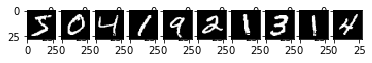

Train Labels:  [5 0 4 1 9 2 1 3 1 4]
<Test Datasets>


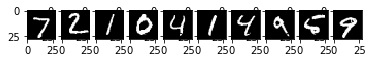

Test Labels:  [7 2 1 0 4 1 4 9 5 9]


In [36]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Train Images: ", train_images.shape)
print("Train Labels: ", train_labels.shape)
print("Test  Images: ", test_images.shape)
print("Test  Labels: ", test_labels.shape)

print("="*50)
print("<Train Datasets>")
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_images[i], 'gray')
plt.show()
print("Train Labels: ", train_labels[0:10])

print("="*50)
print("<Test Datasets>")
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(test_images[i], 'gray')
plt.show()
print("Test Labels: ", test_labels[0:10])

# 2. Pre-process

In [37]:
train_images = train_images.reshape((train_images.shape[0], 784))
train_labels = to_categorical(train_labels)

test_images = test_imgaes.reshape((test_images.shape[0], 784))
test_labels = to_categorical(test_labels)

print("Train Images: ", train_images.shape)
print("Train Labels: ", train_labels.shape)
print("Test  Images: ", test_imgaes.shape)
print("Test  Labels: ", test_labels.shape)

Train Images:  (60000, 784)
Train Labels:  (60000, 10)
Test  Images:  (10000, 784)
Test  Labels:  (10000, 10)


# 3. Model

In [29]:
model = Sequential()
model.add( Dense(256, input_shape=(784,)) )
model.add( Activation('sigmoid') )
model.add( Dense(128) )
model.add( Activation('sigmoid') )
model.add( Dropout(rate=0.5) )
model.add( Dense(10, activation='softmax') )

loss_func = 'categorical_crossentropy'
learning_rate = 0.1

optimizer = SGD(lr=learning_rate)

model.compile(loss=loss_func, optimizer=optimizer, metrics=['acc'])

# 4. Training

In [38]:
batch_size = 500
epochs = 5
validation_split = 0.2

history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=validation_split)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 1s 23us/sample - loss: 0.4392 - acc: 0.8781 - val_loss: 0.3063 - val_acc: 0.9176
Epoch 2/5
48000/48000 [==============================] - 1s 21us/sample - loss: 0.4086 - acc: 0.8863 - val_loss: 0.2877 - val_acc: 0.9210
Epoch 3/5
48000/48000 [==============================] - 1s 22us/sample - loss: 0.3806 - acc: 0.8924 - val_loss: 0.2723 - val_acc: 0.9241
Epoch 4/5
48000/48000 [==============================] - 1s 22us/sample - loss: 0.3603 - acc: 0.9000 - val_loss: 0.2602 - val_acc: 0.9272
Epoch 5/5
48000/48000 [==============================] - 1s 23us/sample - loss: 0.3428 - acc: 0.9042 - val_loss: 0.2483 - val_acc: 0.9302


# 5. Plot Training Result

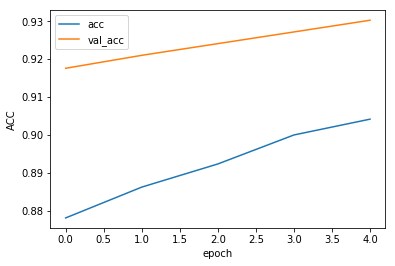

In [39]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('ACC')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

# 6. Evaluation

In [40]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('loss: {:.3f} \t acc: {:.3f}'.format(test_loss, test_acc))

10000/10000 [==============================] - 1s 58us/sample - loss: 0.2515 - acc: 0.9314
loss: 0.252 	 acc: 0.931


# 7. Prediction

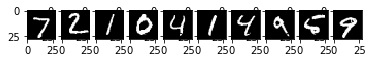

[7 2 1 0 4 1 4 9 6 9]


In [42]:
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow( test_images[i].reshape((28, 28)), 'gray' )
plt.show()

test_prediction = model.predict(test_images[0: 10])
test_prediction = np.argmax(test_prediction, axis=1)
print(test_prediction)